In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Show first 5 rows
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
titanic.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

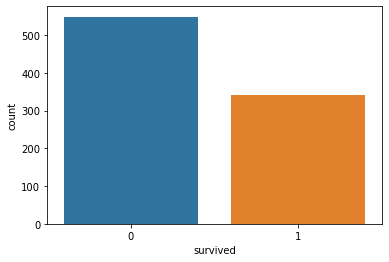

In [3]:
sns.countplot(x='survived', data=titanic)
plt.show()


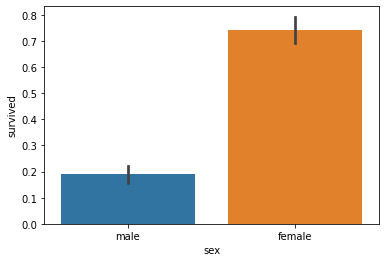

In [4]:
sns.barplot(x='sex', y='survived', data=titanic)
plt.show()


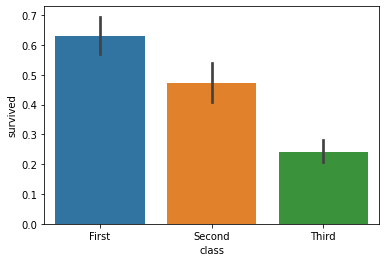

In [5]:
sns.barplot(x='class', y='survived', data=titanic)
plt.show()

In [6]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

In [7]:
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)


In [8]:
titanic.drop('deck', axis=1, inplace=True)
#because deck has no effect on other columns so it's just a filler

In [9]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
# beacuse family is all combined together

In [18]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,embarked,who,adult_male,alive,alone,family_size,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,S,man,True,no,False,2,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,C,woman,False,yes,False,2,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,S,woman,False,yes,True,1,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,S,woman,False,yes,False,2,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,S,man,True,no,True,1,1,0,1,0,1


In [11]:
# the changes in columns are made

In [19]:
print(titanic.columns)


Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'who', 'adult_male', 'alive', 'alone', 'family_size', 'sex_male',
       'class_Second', 'class_Third', 'embark_town_Queenstown',
       'embark_town_Southampton'],
      dtype='object')


In [20]:
titanic = pd.get_dummies(titanic, columns=['who', 'embarked'], drop_first=True)
# get_dummies() converts catagorical data into numeric form like 0s , 1s

In [21]:
X = titanic.drop(columns=['survived', 'alive'])  # Features (drop target and any redundant)
y = titanic['survived']  # Target variable


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression(max_iter=500)  # or even 1000
model.fit(X_train, y_train)


LogisticRegression(max_iter=500)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

#this is new for me

LogisticRegression(max_iter=200)

In [28]:
y_pred = model.predict(X_test_scaled)


In [30]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_scaled)
print(y_pred)
print(classification_report(y_test, y_pred))


[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

